# EDA

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

## Estimates of Location

In [8]:
state = pd.read_csv('../../data/common_datasets/state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


### Mean & Median
- The median is referred to as a **robust estimate of location** since it is not influenced by outliers (extreme cases) that could skew the results 
- When outliers are the result of bad data, the mean will result in a poor estimate of location, while the median will still be valid.

In [9]:
print(f"Mean Population  : {state['Population'].mean():}")
print(f"Median Population: {state['Population'].median()}")


Mean Population  : 6162876.3
Median Population: 4436369.5


### Weighted Mean
- If we want to compute the average murder rate for the country, we need to use a weighted mean or median to account for different populations in the states. 
- Weighted mean is available with NumPy

In [10]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

## Exploring the Data Distribution


### Percentiles and Boxplots

In [11]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [12]:
state['Murder.Rate'].median() # 50 percentile is also a median

4.0

#### Boxplot
- **pandas** provides a number of basic exploratory plots for data frame

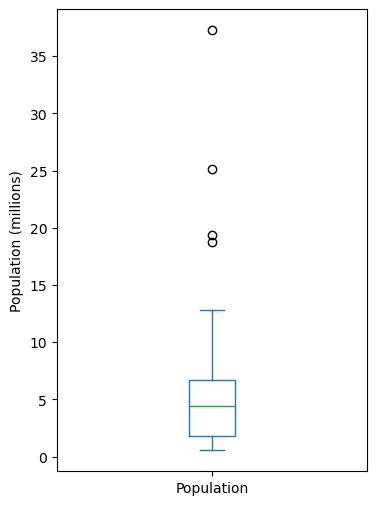

In [13]:
ax = (state['Population'] / 1_000_000).plot.box(figsize=(4,6))
ax.set_ylabel('Population (millions)')
plt.show()

- The top and bottom of the box are the 75th and 25th percentiles
- The median is shown by the horizontal line in the box.
- The dashed lines, referred to as **whiskers**, extend from the top and bottom of the box to indicate the range for the bulk of the data
- Any data outside of the whiskers is plotted as single points or circles (often considered outliers).

### Frequency Tables and Histograms

In [14]:
binnedPopulation = pd.cut(state['Population'] / 1_000_000, 10)
binnedPopulation.name = 'binnedPopulation'

bin_count = binnedPopulation.value_counts().sort_index()

In [15]:
df = pd.concat([state['Abbreviation'], binnedPopulation], axis=1)
bin_state = df.groupby('binnedPopulation')['Abbreviation'].apply(list)
bin_state.name = 'States'

In [16]:
freq_table = pd.concat([bin_count, bin_state], axis=1)
freq_table

,count,States
binnedPopulation,,
"(0.527, 4.233]",24,"[AK, AR, CT, DE, HI, ID, IA, KS, ME, MS, MT, N..."
"(4.233, 7.902]",14,"[AL, AZ, CO, IN, KY, LA, MD, MA, MN, MO, SC, T..."
"(7.902, 11.571]",6,"[GA, MI, NJ, NC, OH, VA]"
"(11.571, 15.24]",2,"[IL, PA]"
"(15.24, 18.909]",1,[FL]
"(18.909, 22.578]",1,[NY]
"(22.578, 26.247]",1,[TX]
"(26.247, 29.916]",0,[]
"(29.916, 33.585]",0,[]


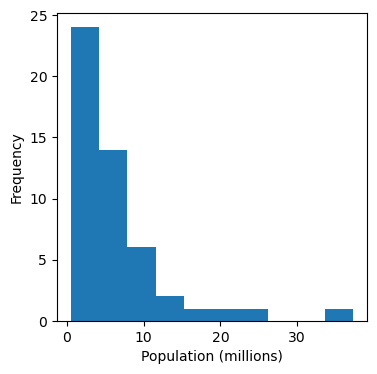

In [17]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))
ax.set_xlabel('Population (millions)')
plt.show()

### Density Plots and Estimates
- A **density plot** can be thought of as a *smoothed* histogram, although it is typically computed directly from the data through a *kernel density estimate*

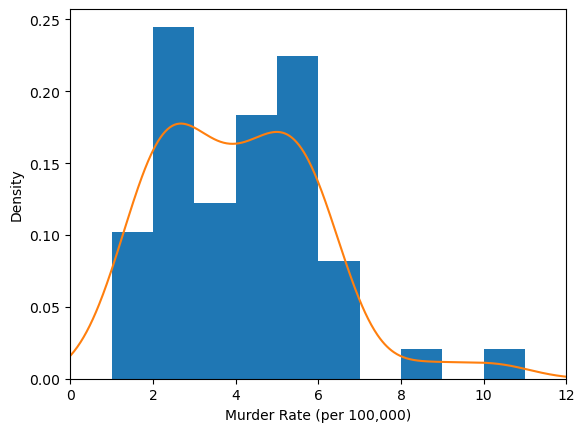

In [26]:
ax = state['Murder.Rate'].plot.hist(density=True,     # y-axis as density instead of count
                                    xlim=[0,12],   
                                    bins=range(1,12)) # set bin range from 1 to 12
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')
plt.show()

## Exploring Binary and Categorical Data
- For categorical data, simple proportions or percentages tell the story of the data.

### Bar Chart (Histogram of Cat Data)
- A bar chart resembles a histogram; in a bar chart the x-axis represents different categories of a factor variable, while in a histogram the x-axis represents values of a single variable on a numeric scale.
- Getting a summary of a binary variable or a categorical variable with a few categories is a fairly easy matter: we just figure out the proportion of 1s, or the proportions of the important categories.

### Mode
- The mode is the value—or values in case of a tie—that appears most often in the data. 
- The mode is a simple summary statistic for categorical data, and it is generally not used for numeric data.
- For example: in most parts of the United States, the mode for religious preference would be Christian

### Expected Value
- The expected value is calculated as follows:
  - Multiply each outcome by its probability of occurrence.
  - Sum these values.
- Expected value is a fundamental concept in business valuation and capital budgeting
- For example: the marketer firm figures that 5% of the attendees will sign up for the $300 service, 15% will sign up for the $50 service, and 80% will not sign up for anything. 
  - The expected value of a webinar attendee is thus $22.50 per month, calculated as follows:
$$ EV = (0.05)*(300) + (0.15)*50 + (0.8)*0 = 22.5 $$


In [29]:
df_cat = pd.read_csv('../../data/common_datasets/cat_train.csv')

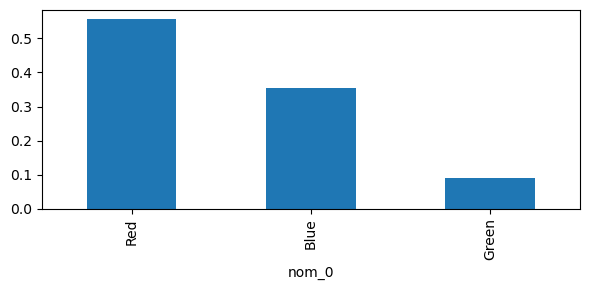

In [39]:
df_cat['nom_0'].value_counts(normalize=True).plot.bar(figsize=(6,3)) # normalise to get the proportion of each category
plt.tight_layout()

plt.show()